<a href="https://colab.research.google.com/github/ti-molodykh/colab/blob/main/%D0%97%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5%E2%84%963.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random as rnd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def coin(p):
  return int(rnd.random() < p)

def bag_coins(n, p):
  return sum( [coin(p) for _ in range(n)] )

In [ ]:
bag_coins(100, 0.3) # историческая конверсия 30%

7

In [ ]:
p0 = 0.3
p1 = 0.40 # увеличение на 10 процентных пунктов
N = 200
simulationH0 = [ bag_coins(N, p0) for _ in range(20000) ]
simulationH1 = [ bag_coins(N, p1) for _ in range(20000) ]

In [ ]:
alpha = 5
beta = 20

In [ ]:
perI = np.percentile(simulationH0, 100 - alpha)
perII = np.percentile(simulationH1, beta)

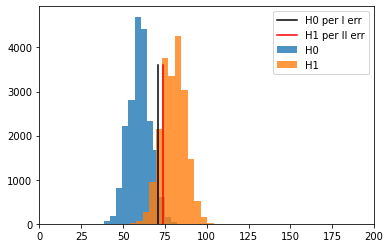

In [ ]:
bins = 14
plt.hist(simulationH0, bins=bins, label='H0', alpha= 0.8)
plt.hist(simulationH1, bins=bins, label='H1', alpha= 0.8)

#res = 22
#plt.plot([res, res], [0, 3000], color='green', label='Результат нашего ОДНОГО теста')

plt.xlim([0, N])
plt.plot([perI, perI], [0, 3600], color='black', label='H0 per I err')
plt.plot([perII, perII], [0, 3600], color='red', label='H1 per II err')

plt.legend();

In [ ]:
rnd.seed(0)
true_H = rnd.choice(['H0', 'H1'])

if true_H == 'H0':
  true_p = 0.3
else:
  true_p = 0.4

In [ ]:
true_p

0.4

# Настоящий тест

In [ ]:
rnd.seed(0)
res = bag_coins(N, true_p)
res

73

In [ ]:
res = 73 # как pvalue считать? 
bigger_then_result = [e  for e in simulationH0 if e >= res]
len(bigger_then_result), len(simulationH0)
p_value = len(bigger_then_result)/len(simulationH0)
p_value

0.02895

Б тест: тест в котором не нужна контрольная выборка. 
<br>Потому что мы знаем контрольную величину

АБ тест: в контрольной выборке неизвестное контрольное значение(метрика)
<br> Всего лишь предпологаем, что контрольная выборка будет соответствоать историческим данным

In [ ]:
# II error
smaller_then_perI = [e  for e in simulationH1 if e <= perI]
errII = len(smaller_then_perI)/len(simulationH1)
errII

0.49825

In [ ]:
res = 22 # как pvalue считать? 
bigger_then_result = [e  for e in simulationH0 if e >= res]
len(bigger_then_result), len(simulationH0)
p_value = len(bigger_then_result)/len(simulationH0)
p_value

0.0

In [ ]:
np.percentile(simulationH0, 95)

8.0

In [ ]:
Если отвергаем Н0, но на самом деле она верна,
с какой вероятностью ошибёмся?

In [ ]:
len(res7)/len(simulationH0)*100, "%"

(11.77, '%')

In [ ]:
res7 = [e for e in simulationH0 if e == 7]
len(res7)

1177

In [ ]:
len(res7), len(simulationH0), len(res7)/len(simulationH0)

(1177, 10000, 0.1177)

Эксперимент 2-хвостовой<br>

P value<br>
Доверительный интервал<br>
Статистическая значимость<br>
Вероятность ошибки I рода alpha = 5%<br>
Вероятность ошибки II рода beta<br>



In [ ]:
rnd.seed(0)
w = 200
L = [ bag_coins(w, 0.8)/w for _ in range(10000) ]

Доверительный интервал 74.5 %,  85.5 %


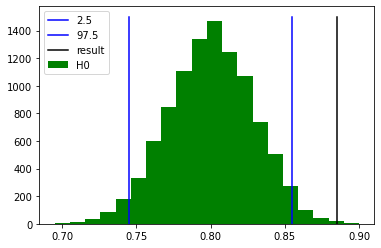

In [ ]:
#H0 - конверися 80%
alpha = 5
plt.hist(L, bins=20, label='H0', color='green');
p_left = np.percentile(L, alpha/2)
p_r = np.percentile(L, 100-alpha/2)
plt.plot([p_left, p_left], [0, 1500], color='blue', label=str(alpha/2))
plt.plot([p_r, p_r], [0, 1500], color='blue', label=str(100-alpha/2))
print('Доверительный интервал', round(p_left*100, 1), '%, ', round(p_r*100, 1), '%')

plt.plot([res, res], [0, 1500], color='black', label='result')
plt.legend();

In [ ]:
x = len([e for e in L if e >= res])/len(L)
if x < 0.025:
  print('Различия значимые')
else:
  print('Различия не значимые')

Различия значимые


In [ ]:
p_value = len([e for e in L if e >= res])/len(L) * 2

# Реальный тест

In [ ]:
rnd.seed(0)
p_H1 = rnd.choice([0.69, 0.71, 0.75, 0.79, 0.81, 0.86, 0.9, 0.95, 0.99]) # любая конверсия для альтернативной гипотезы
p_true = rnd.choice([0.5, p_H1]) # либо Н0 верна, либо Н1 верна

In [ ]:
rnd.seed(0)

w = 200
res = bag_coins(w, p_true)/w
res

0.885

In [ ]:
p_left/len(L)

6.8e-05

In [ ]:
p025 = np.percentile(L, 2.5)
p975 = np.percentile(L, 97.5)

In [ ]:
p025, p975

(0.7666666666666667, 0.8316666666666667)

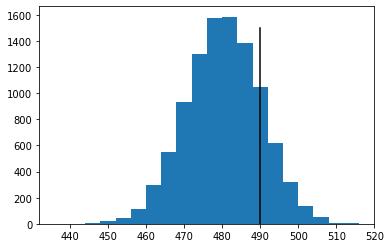

In [ ]:

plt.hist(L, bins=20, label='H0');
res = 490
plt.plot([490, 490], [0, 1500], color='black', label='result')

In [ ]:
res 

490

In [ ]:
perc95 = np.percentile(L, 5)
perc95

496.0

In [ ]:
if res > perc95:
  print('Отвергаем Н0')
else:
  print('Не можем отвергнуть Н0')

Не можем отвергнуть Н0


In [ ]:
import numpy as np

In [ ]:
coin(0.9)

0

In [ ]:
import pandas as pd

# Создаем DataFrame
data = {'Регион': ['Москва', 'Москва', 'Санкт-Петербург', 'Санкт-Петербург'],
        'Продукт': ['Телевизор', 'Холодильник', 'Телевизор', 'Холодильник'],
        'Продажи': [100, 200, 150, 250]}

df = pd.DataFrame(data)

# Создаем сводную таблицу
pivot_table = df.pivot_table(index='Регион', columns='Продукт', values='Продажи', aggfunc='sum')

print(pivot_table)


Продукт          Телевизор  Холодильник
Регион                                 
Москва                 100          200
Санкт-Петербург        150          250


In [ ]:
def longest_substring(s):
    left, right = 0, 0
    seen = set()
    max_substring = ''
    
    while right < len(s):
        if s[right] in seen:
            print('+', left, right, seen)
            seen.remove(s[left])
            left += 1
        else:
            print('-', left, right, seen)
            seen.add(s[right])
            right += 1
            if len(seen) > len(max_substring):
                max_substring = s[left:right]
    
    return max_substring

longest_substring("abfcdfc")

- 0 0 set()
- 0 1 {'a'}
- 0 2 {'b', 'a'}
- 0 3 {'b', 'a', 'f'}
- 0 4 {'b', 'a', 'f', 'c'}
+ 0 5 {'a', 'c', 'd', 'f', 'b'}
+ 1 5 {'c', 'd', 'f', 'b'}
+ 2 5 {'c', 'd', 'f'}
- 3 5 {'c', 'd'}
+ 3 6 {'c', 'd', 'f'}
- 4 6 {'d', 'f'}


'abfcd'

In [ ]:
left   0
right  5

SyntaxError: ignored